# End-to-End Machine Learning Workflow with KizenML, XAI, and Cloud Deployment

# Data preprocessing & Visualization using Auto EDA

In [3]:
!pip install --upgrade pandas
!pip install seaborn missingno
!pip install sweetviz
!pip install --upgrade autoviz
!pip install --upgrade jinja2
!pip install featuretools
!pip install tidypy
!pip install pylint==2.11.1


     --------------------------------------- 12.9/12.9 MB 14.9 MB/s eta 0:00:00
     --------------------------------------- 15.8/15.8 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\preethas\\AppData\\Local\\anaconda3\\Lib\\site-packages\\~1mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



     --------------------------------------- 11.0/11.0 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\preethas\\AppData\\Local\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



In [17]:
# Import necessary libraries
import pandas as pd
import sweetviz as sv
import numpy as np
import warnings
import matplotlib.pyplot as plt
import tidypy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
import missingno as msno
# Hide all warnings
warnings.filterwarnings('ignore')


# Data Collection and Preprocessing :

In [10]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Inspect the data
print(titanic_df.head())
print(titanic_df.info())



   PassengerId  Survived  Pclass  \
0       1           0        3     
1       2           1        1     
2       3           1        3     
3       4           1        1     
4       5           0        3     

                          Name                           Sex     Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0    1     
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0    1     
2                               Heikkinen, Miss. Laina  female  26.0    0     
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1     
4                             Allen, Mr. William Henry    male  35.0    0     

   Parch       Ticket        Fare   Cabin Embarked  
0    0           A/5 21171   7.2500   NaN     S     
1    0            PC 17599  71.2833   C85     C     
2    0    STON/O2. 3101282   7.9250   NaN     S     
3    0              113803  53.1000  C123     S     
4    0              373450   8.0500   NaN  

# Data Cleaning

In [11]:
# Drop columns that won't be useful for prediction (e.g., 'PassengerId', 'Name', 'Ticket', 'Cabin')
titanic_df = titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values
# For numerical columns, we can use the median for imputation
# For categorical columns, we can use the most frequent value for imputation

numerical_features = ['Age', 'Fare']
categorical_features = ['Embarked', 'Sex']

# Feature Engineering

In [12]:
# Create new features (e.g., family size)
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

# Drop SibSp and Parch as FamilySize is more informative
titanic_df = titanic_df.drop(columns=['SibSp', 'Parch'])


# Preprocessing Pipelines

In [13]:

# Numerical pipeline: Impute missing values and scale the features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: Impute missing values and apply One-Hot Encoding
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Split the data into features (X) and target (y)
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# Apply the preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Output the transformed features
print("Preprocessed Train Data Shape:", X_train.shape)
print("Preprocessed Test Data Shape:", X_test.shape)

Preprocessed Train Data Shape: (712, 7)
Preprocessed Test Data Shape: (179, 7)


# AutoEDA using sweetviz

In [14]:
# Generate a Sweetviz report
report = sv.analyze(titanic_df)

# Save the report to an HTML file
report.show_html("titanic_sweetviz_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report titanic_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Auto EDA using Autoviz

Shape of your Data Set loaded: (891, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
There are 112 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Survived,int64,0.000000,0,0.000000,1.000000,No issue
Pclass,int64,0.000000,0,1.000000,3.000000,No issue
Sex,object,0.000000,0,,,No issue
Age,float64,13.222080,NA,0.420000,80.000000,"103 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 7 outliers greater than upper bound (67.50) or lower than lower bound(-8.50). Cap them or remove them."
Fare,float64,0.000000,NA,0.000000,512.329200,Column has 97 outliers greater than upper bound (73.86) or lower than lower bound(-31.44). Cap them or remove them.
Embarked,object,0.256739,0,,,"2 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
FamilySize,int64,0.000000,1,0.000000,10.000000,Column has 83 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.


Number of All Scatter Plots = 3


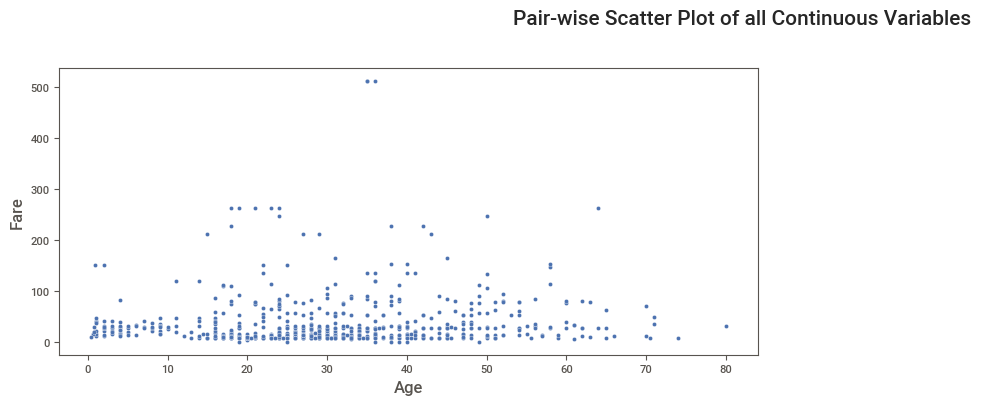

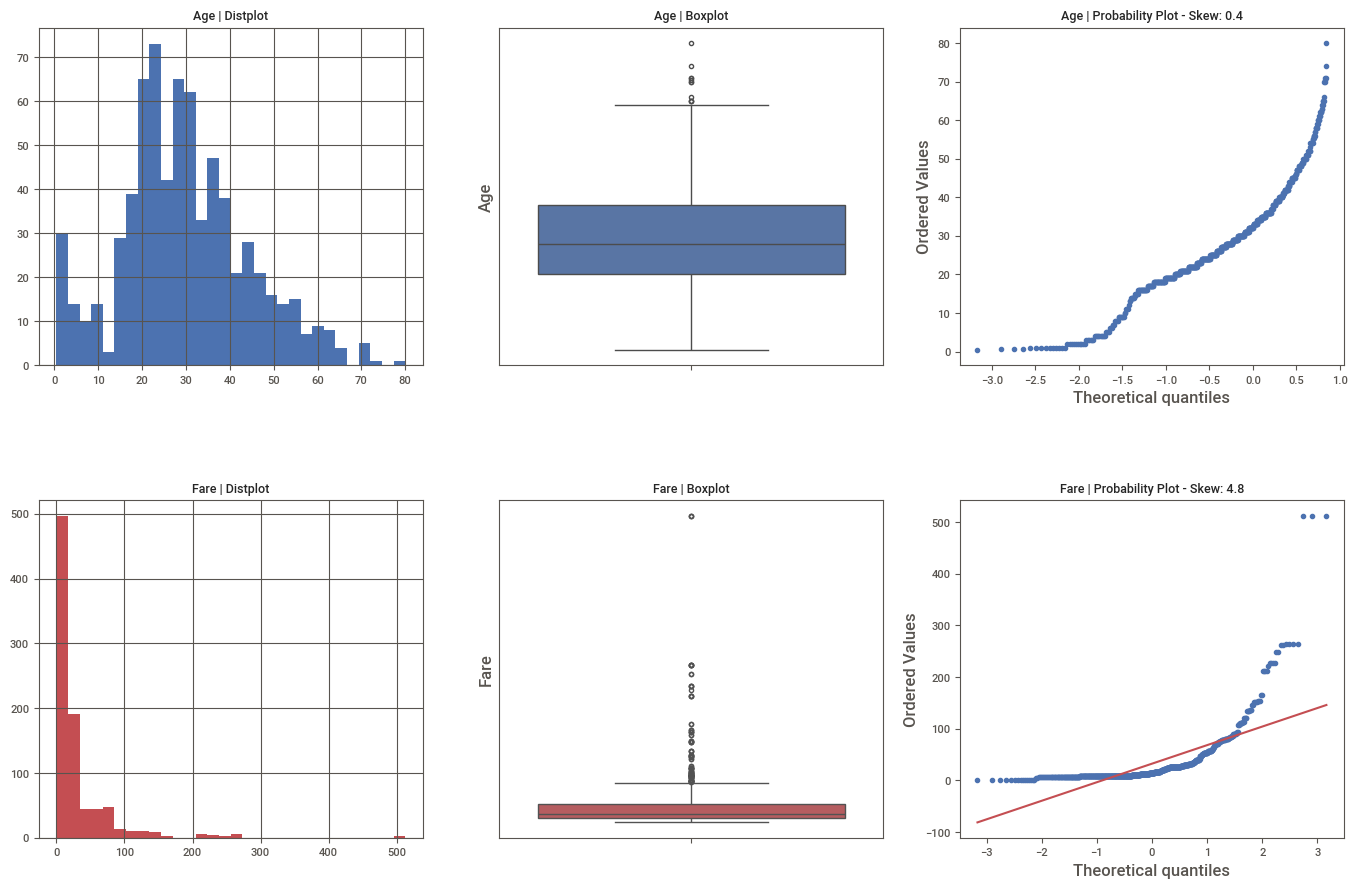

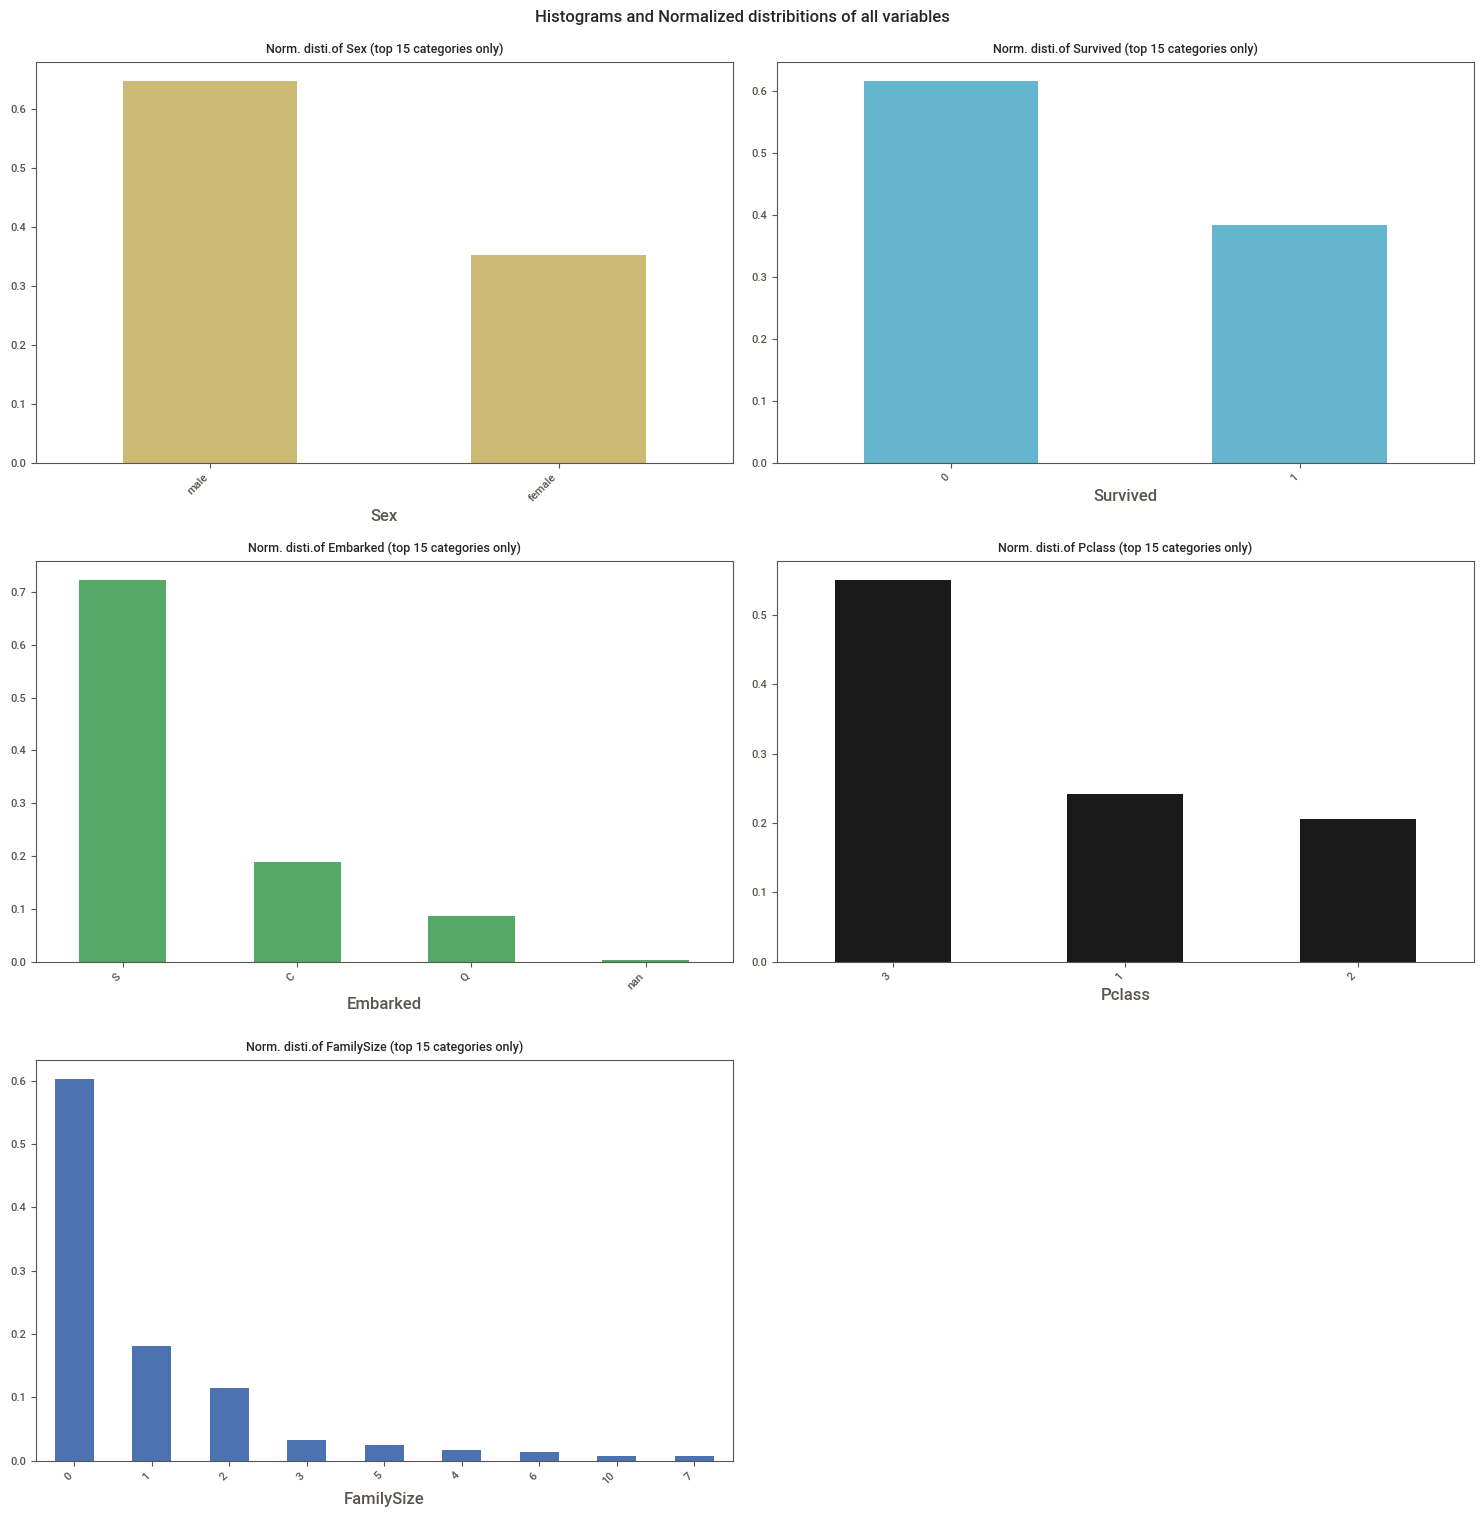

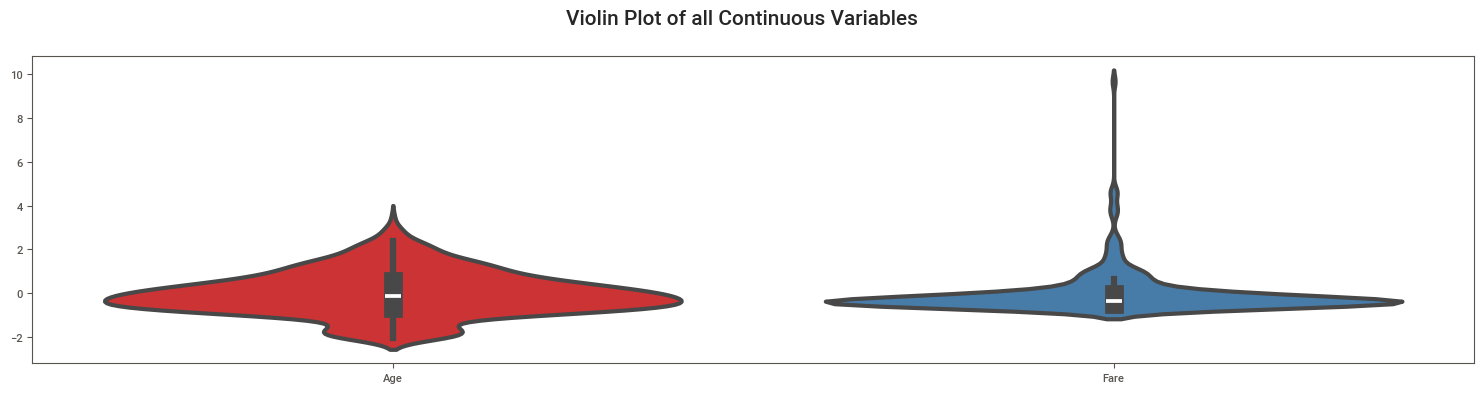

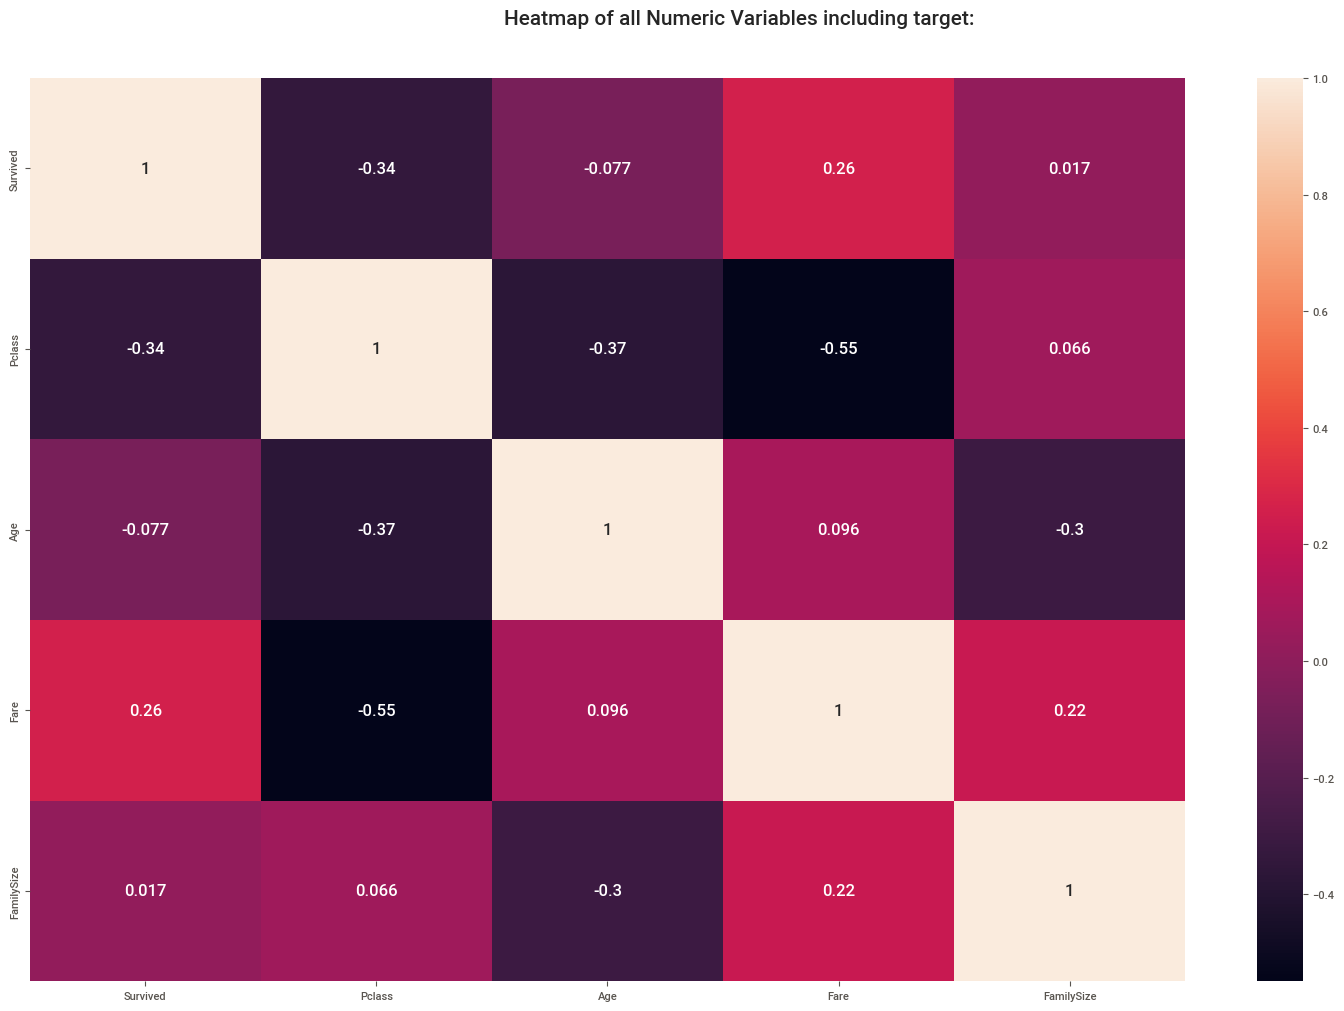

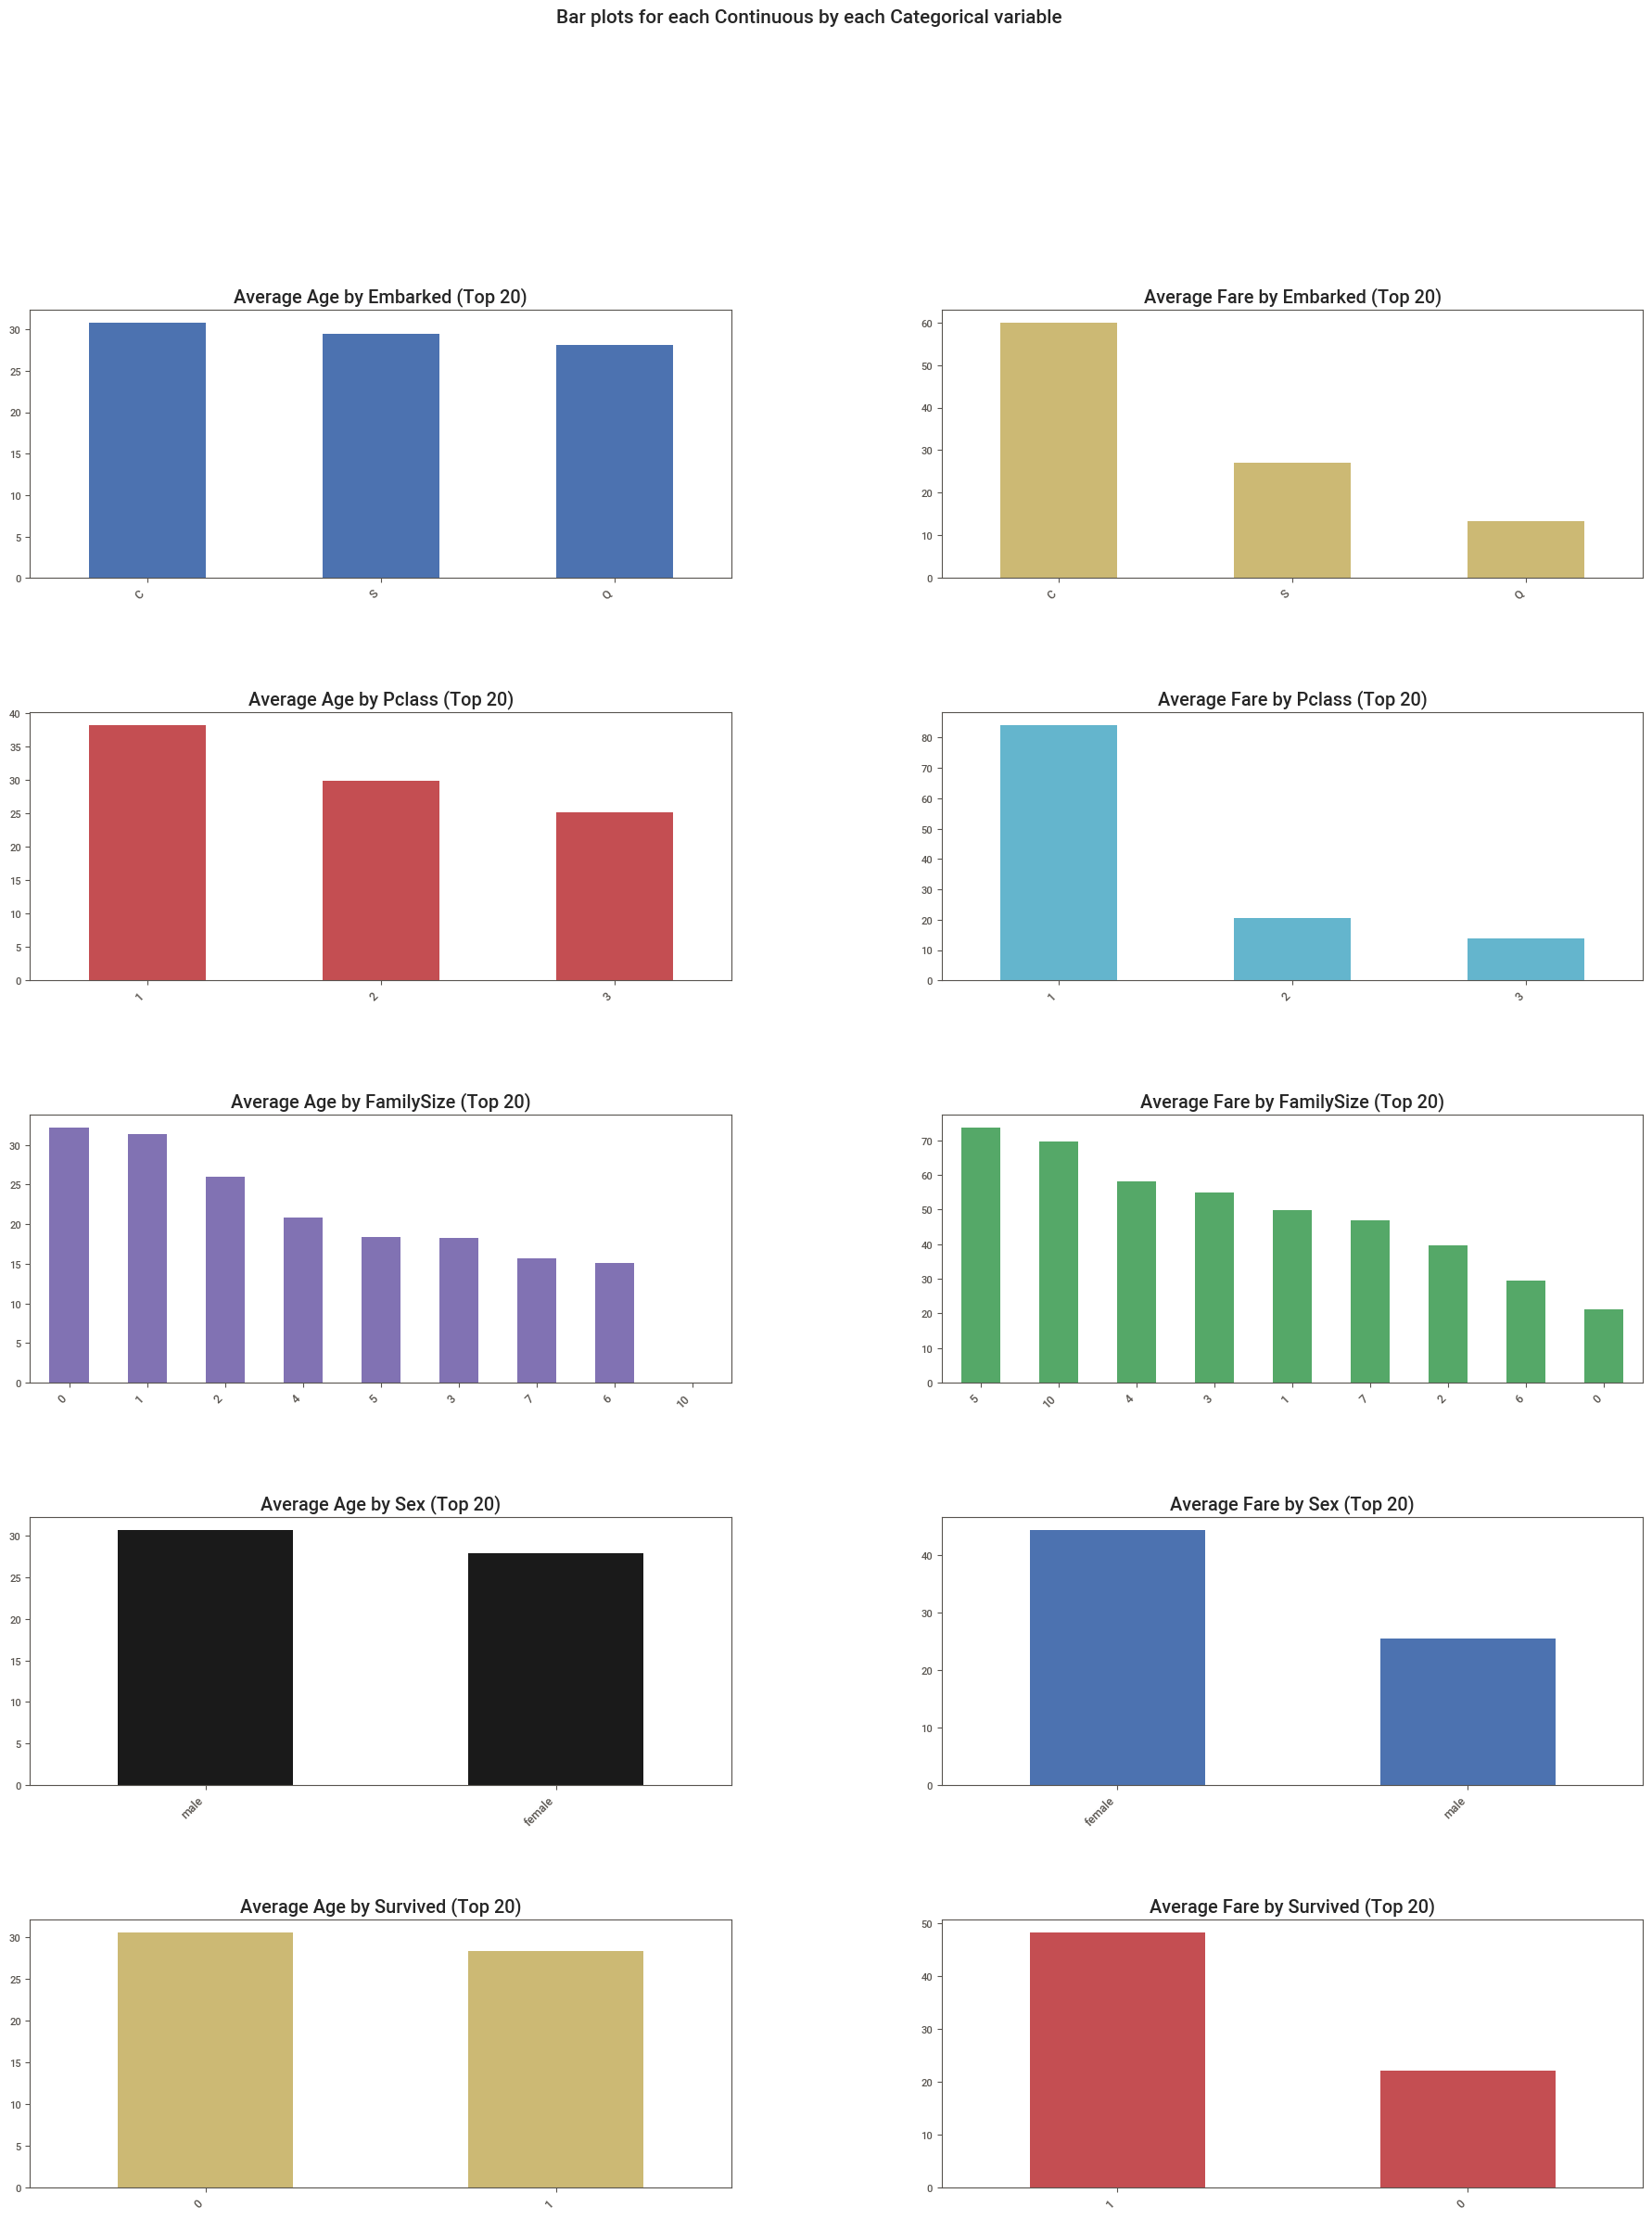

All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [20]:
autoviz = AutoViz_Class()
autoviz_report = autoviz.AutoViz(filename='', dfte=titanic_df, depVar='', verbose=0)

# Feature Engineering

###### Automated Feature Engineering: The code leverages Featuretools to automatically generate new features from the dataset based on relationships between columns.
######  EntitySet: Structures the data for feature synthesis.
######  Deep Feature Synthesis (DFS): Automatically creates new features that are combinations or transformations of the original data.

In [ ]:
import featuretools as ft
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)



num_features = titanic_df.shape[1]
print(f"Number of features: {num_features}")
# Print the column names
print("Column names:", titanic_df.columns)

# Define entityset
es = ft.EntitySet(id='data')

# Add dataframe to entityset
es = es.add_dataframe(
    dataframe_name='data',
    dataframe=titanic_df,
    index='PassengerId'
)

# Define features
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name='data'
)


print('After selecting features')
num_features = feature_matrix.shape[1]
print(f"Number of features: {num_features}")
# Print the column names
print("Column names:", feature_matrix.columns)


# Use missingno to visualise missing data

<b>missingno</b> is a Python library that provides simple visualizations to analyze missing data in your datasets. It allows you to quickly assess the distribution and structure of missing data and how it relates to other variables.

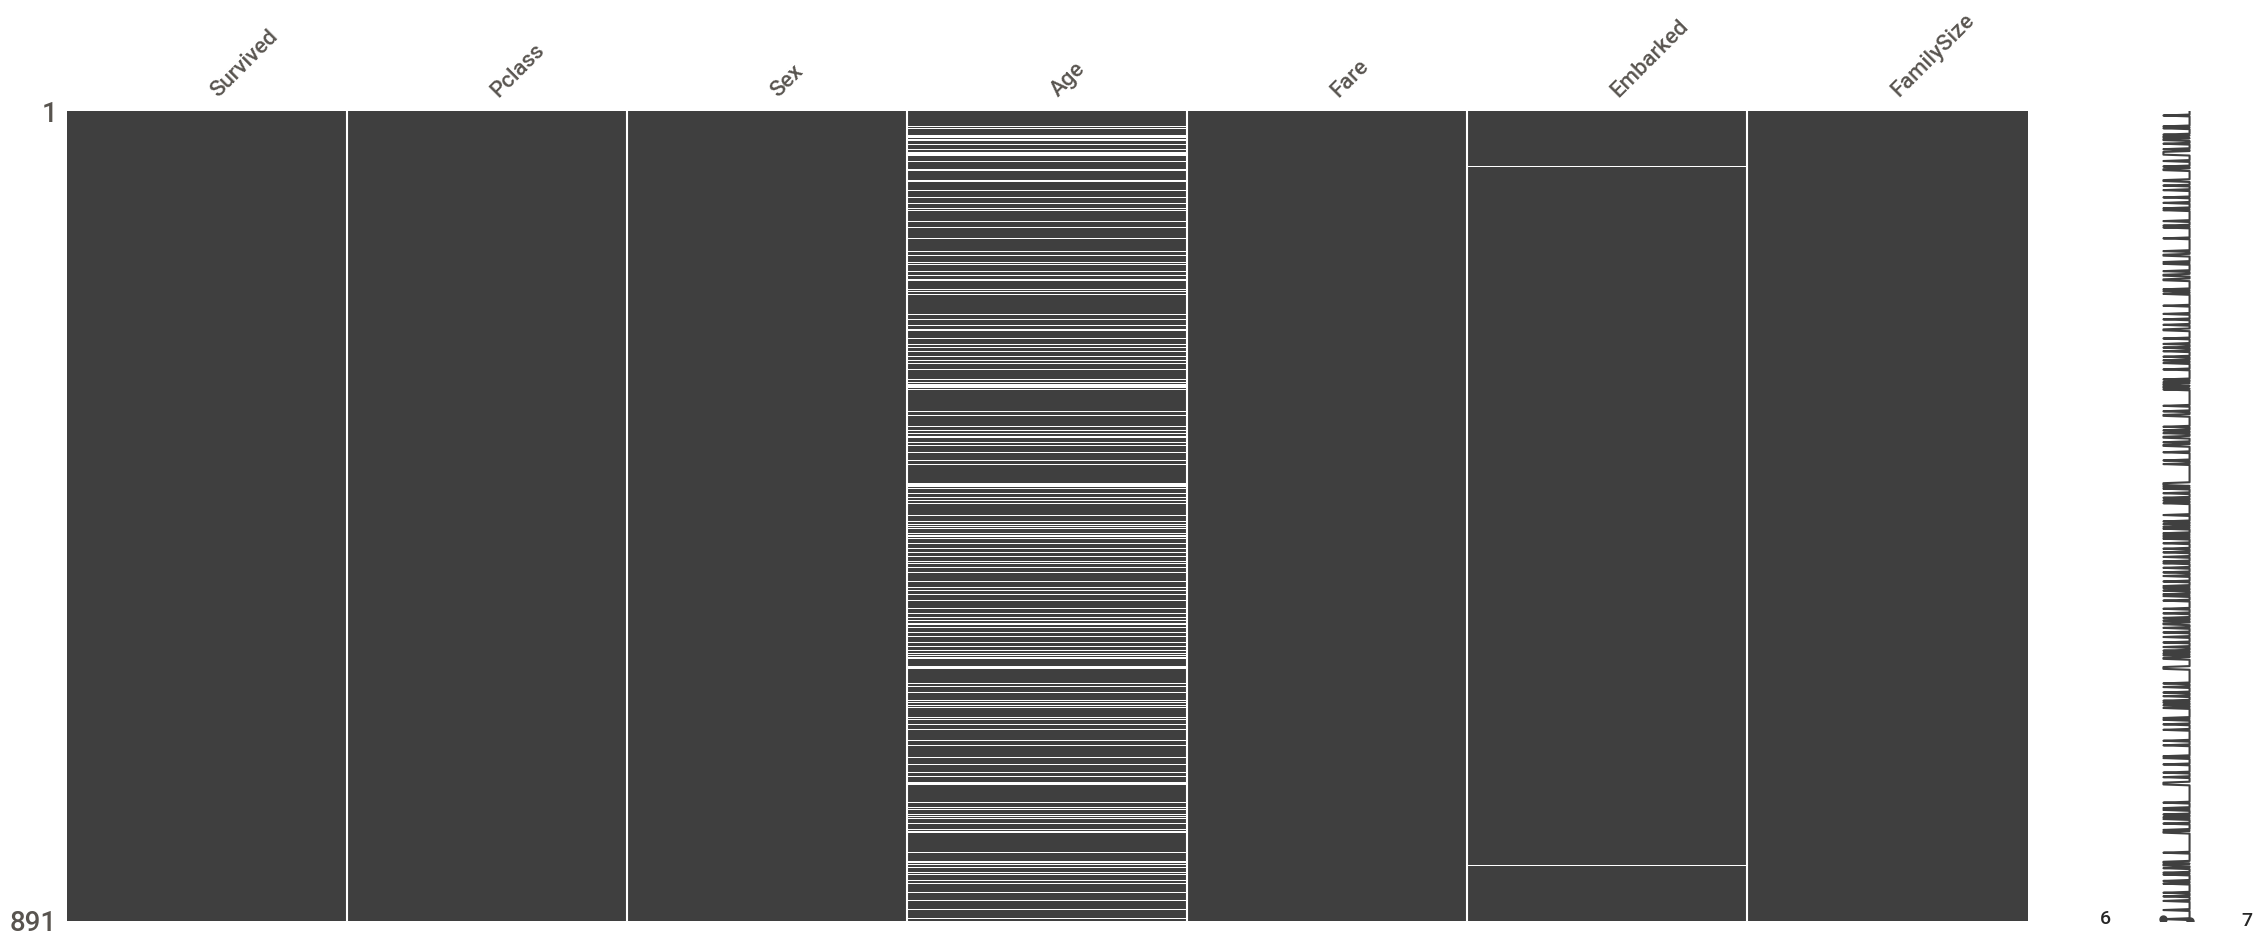

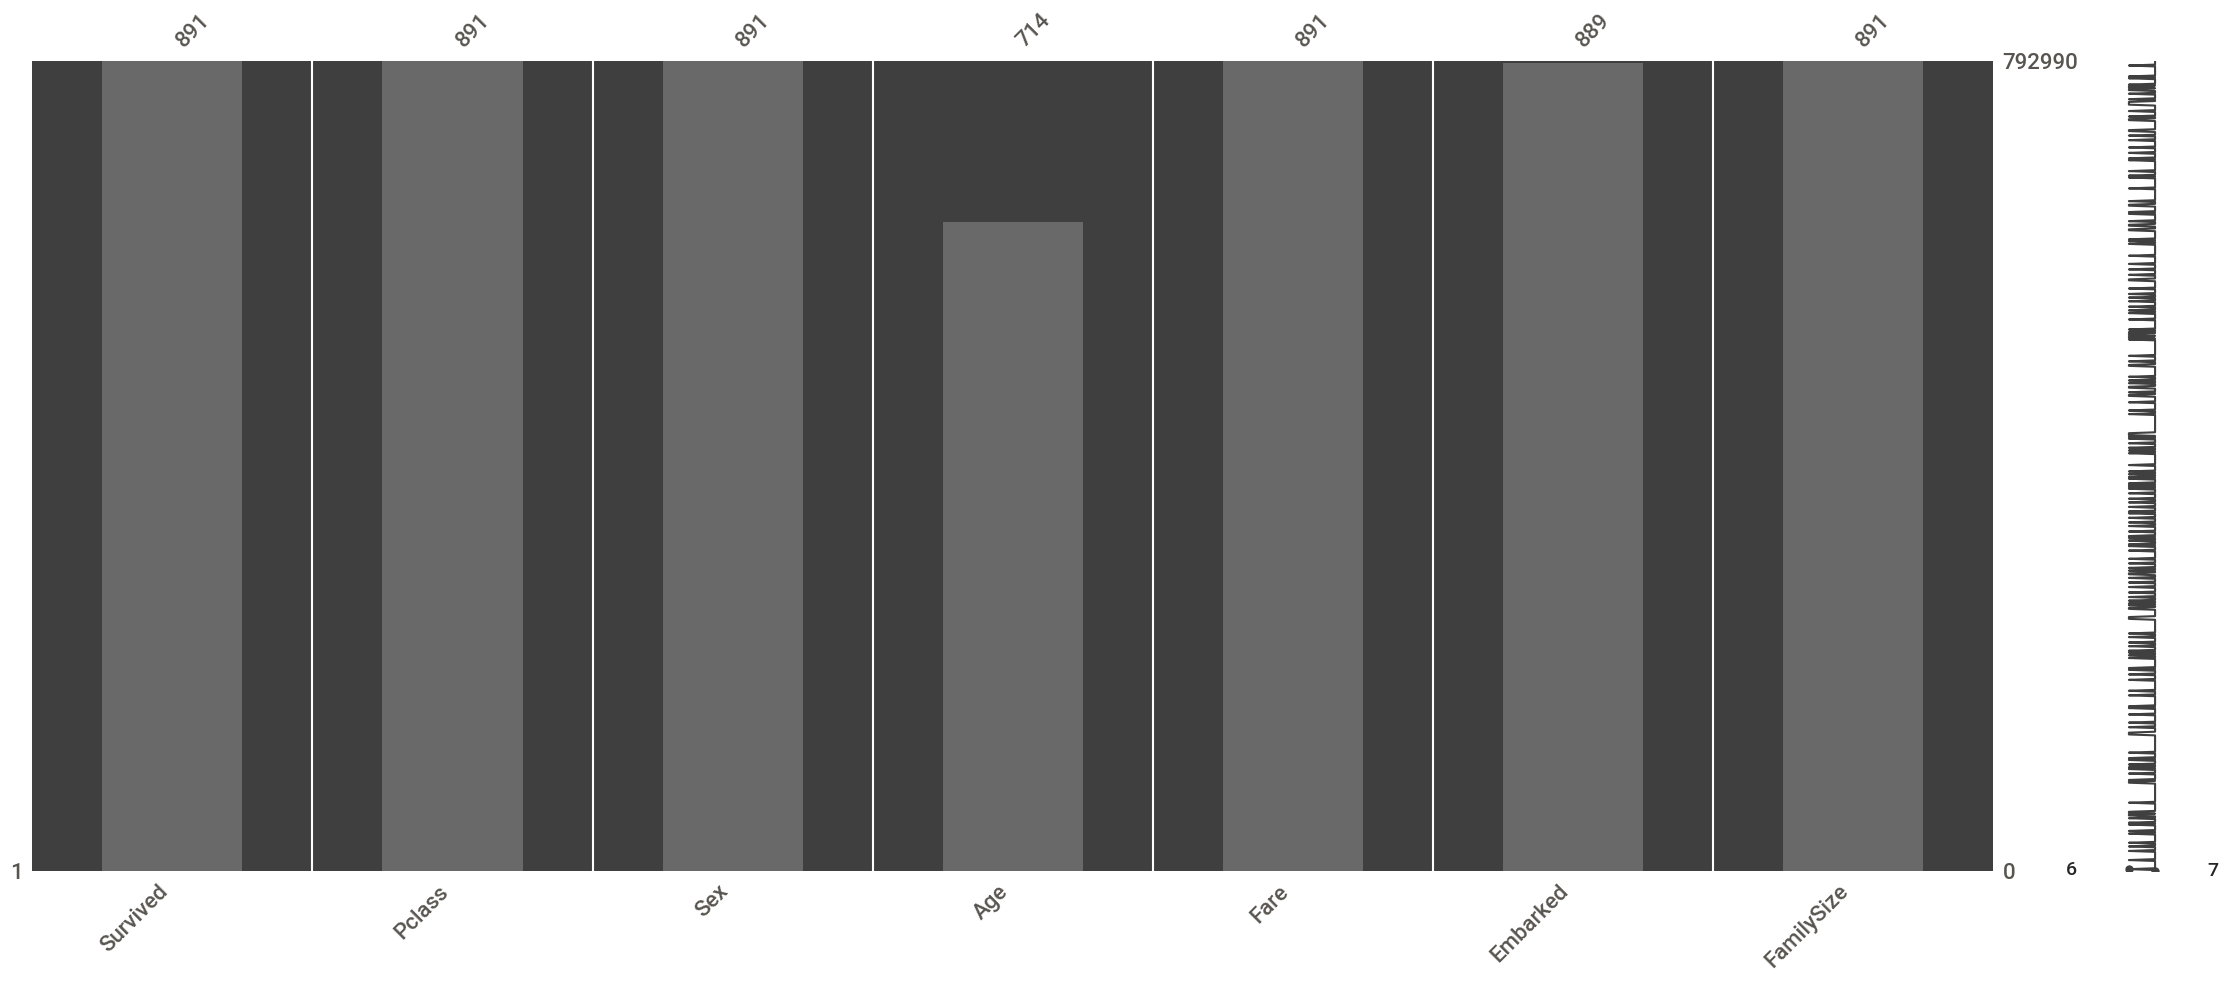

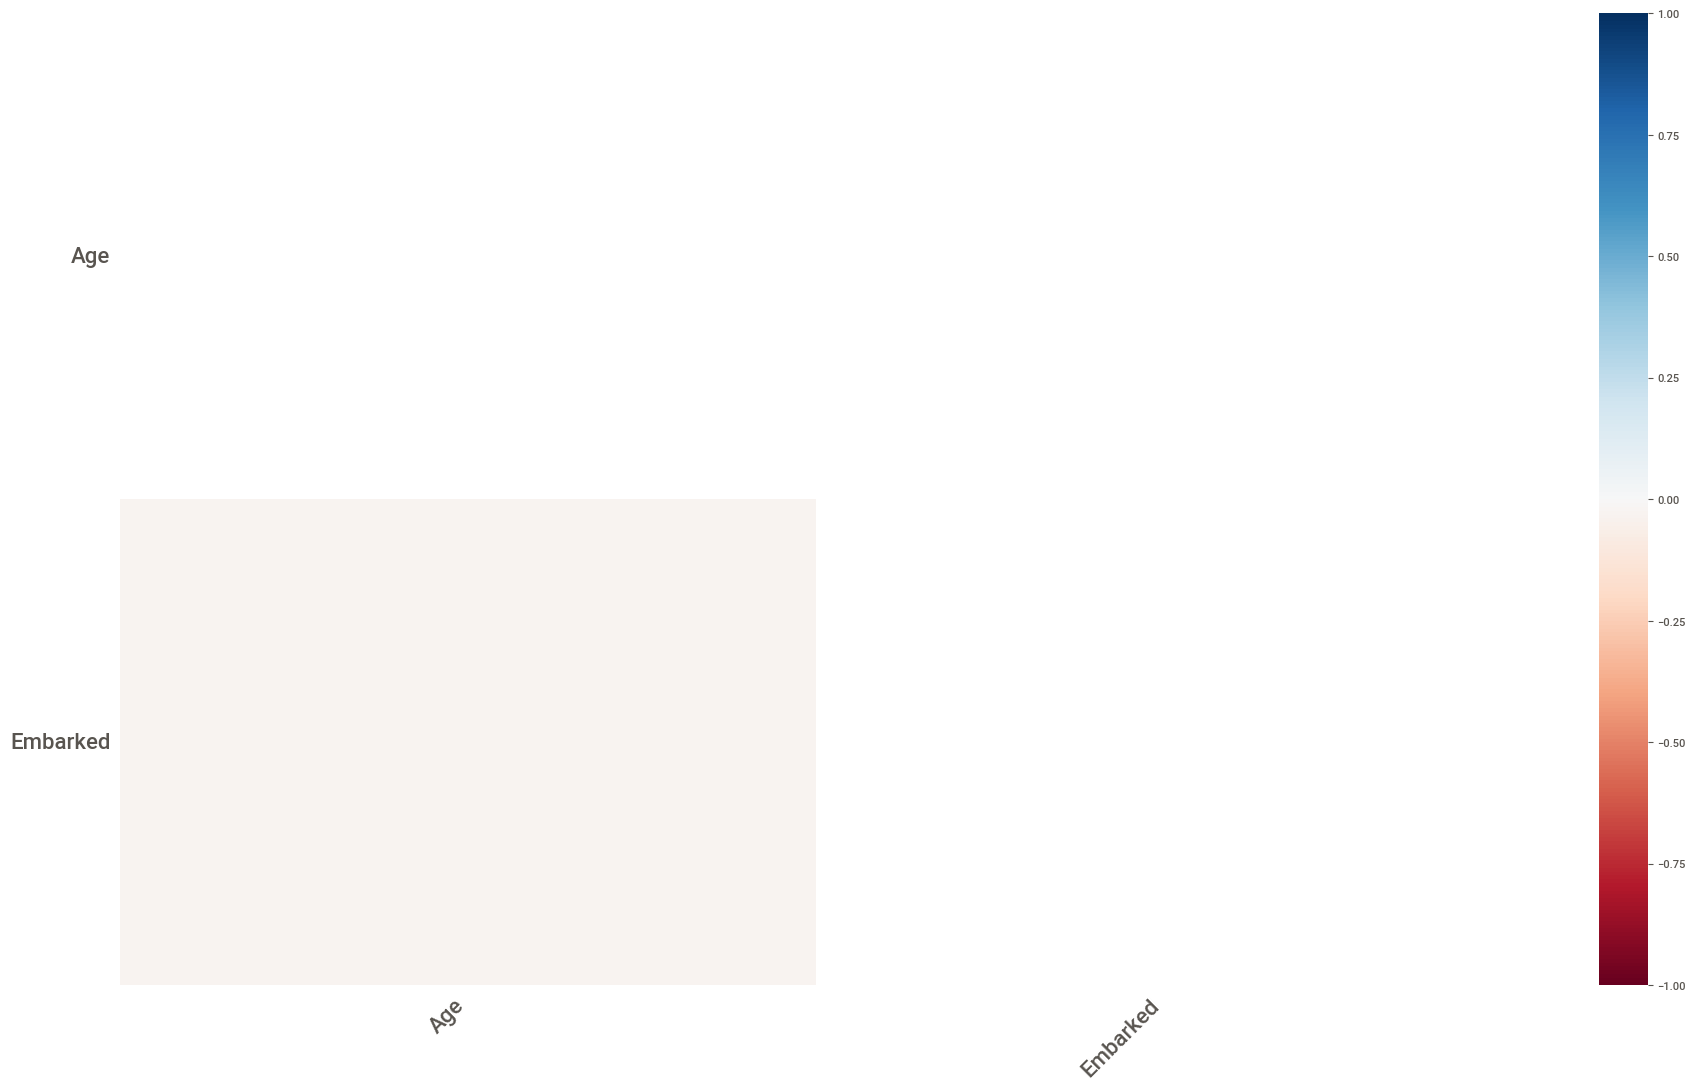

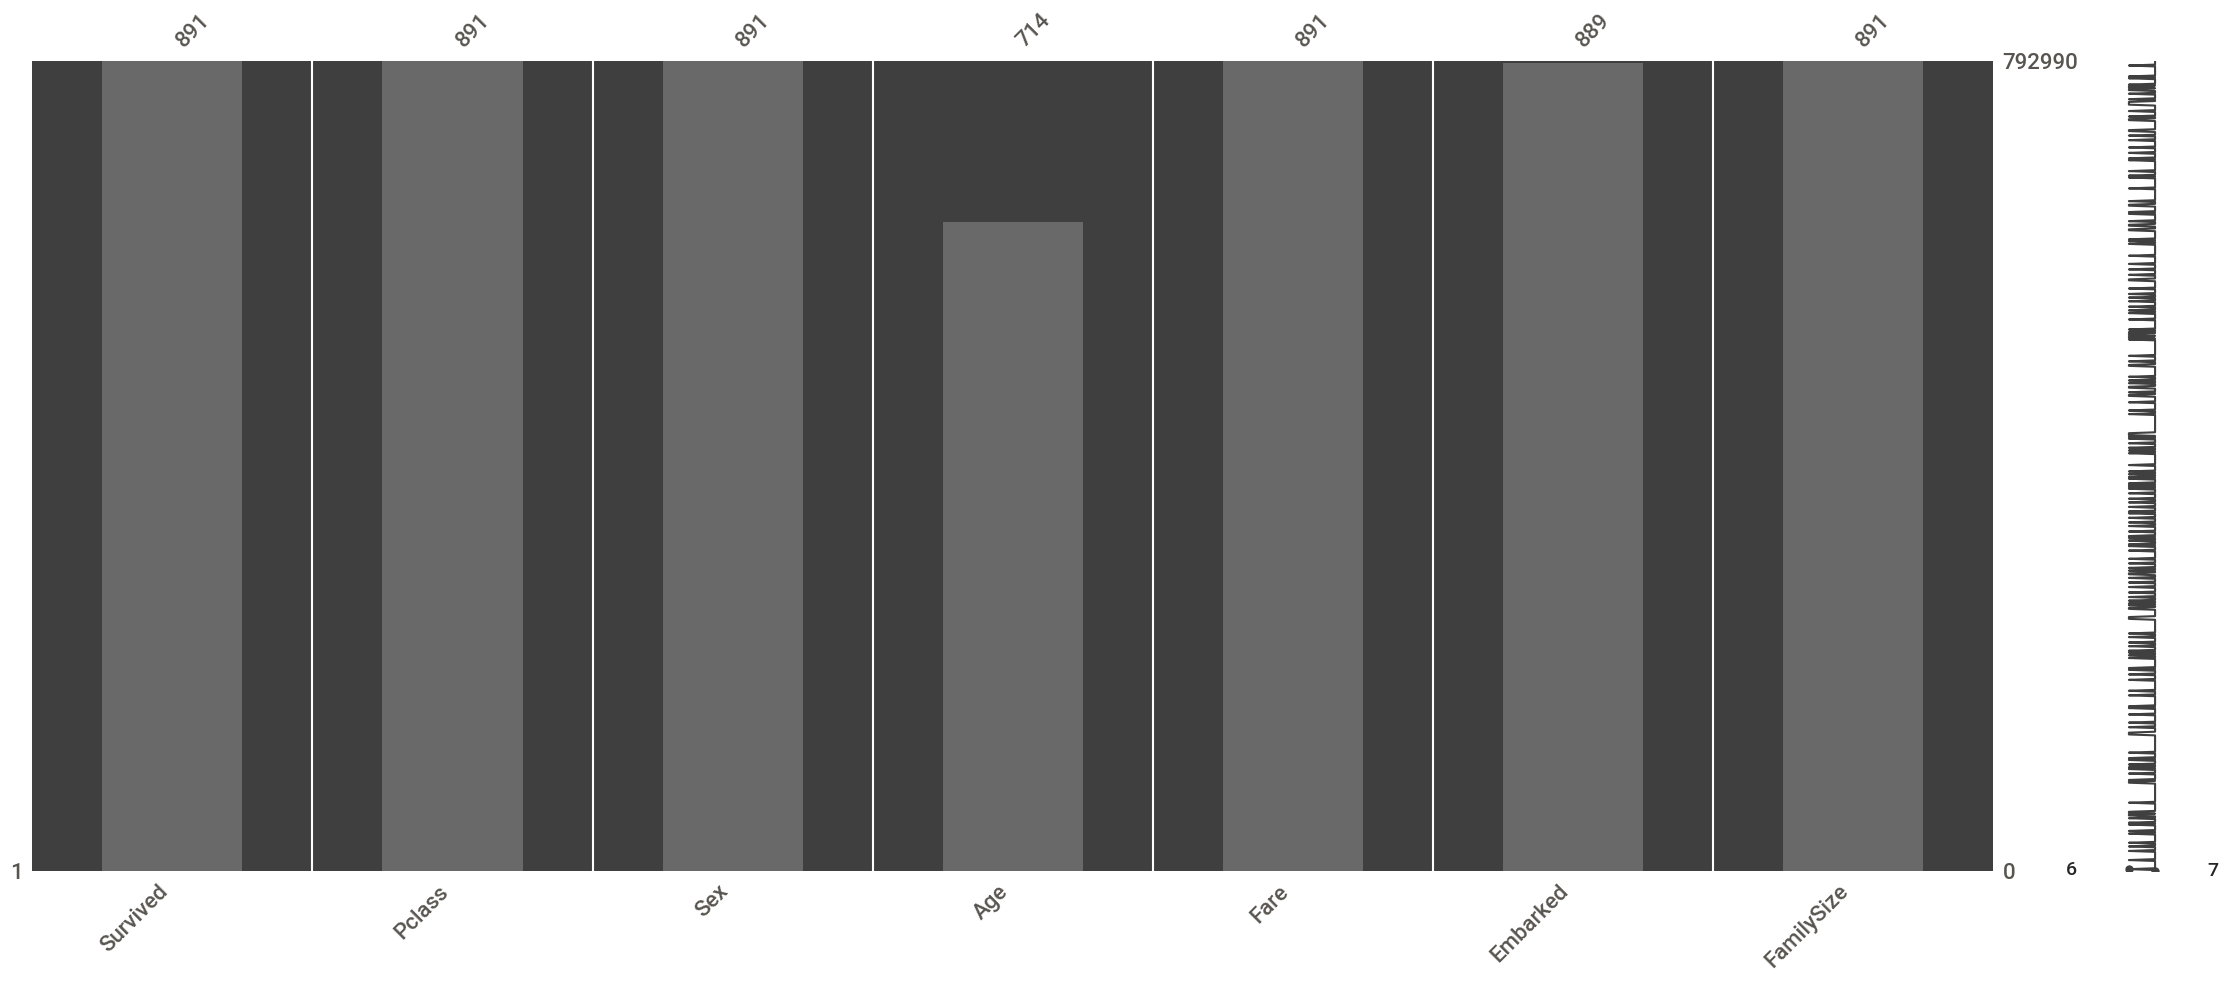

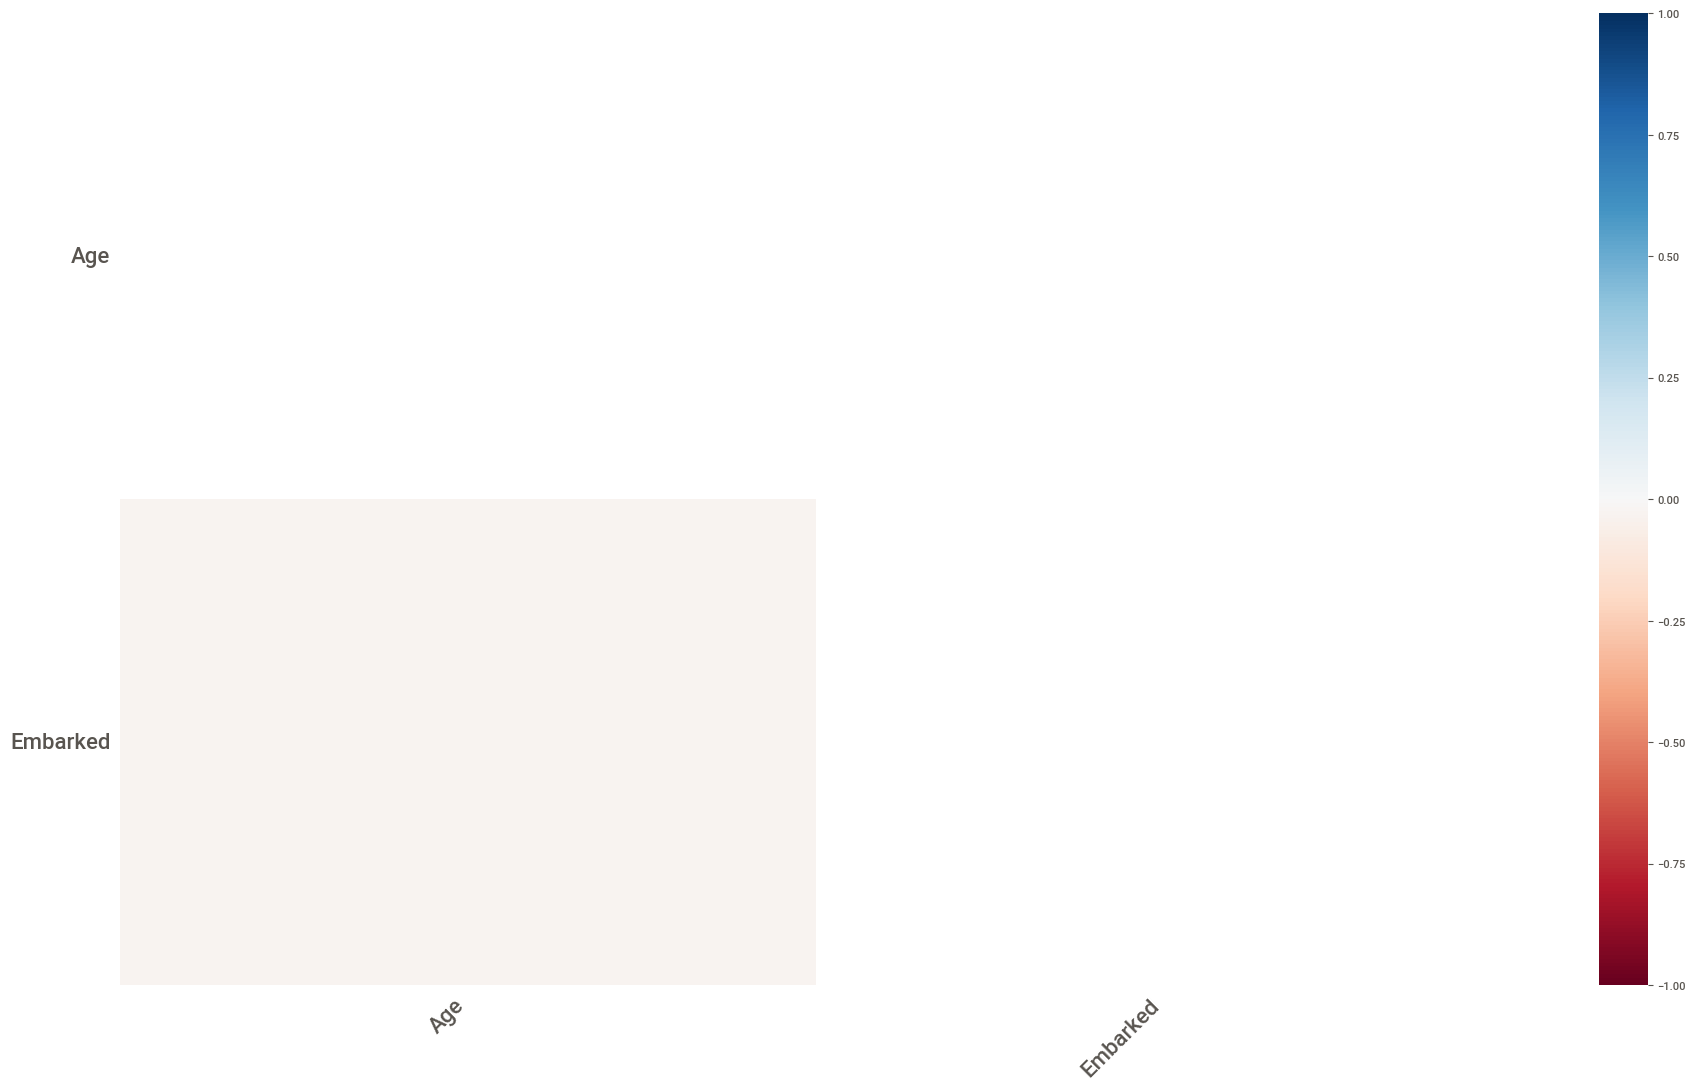

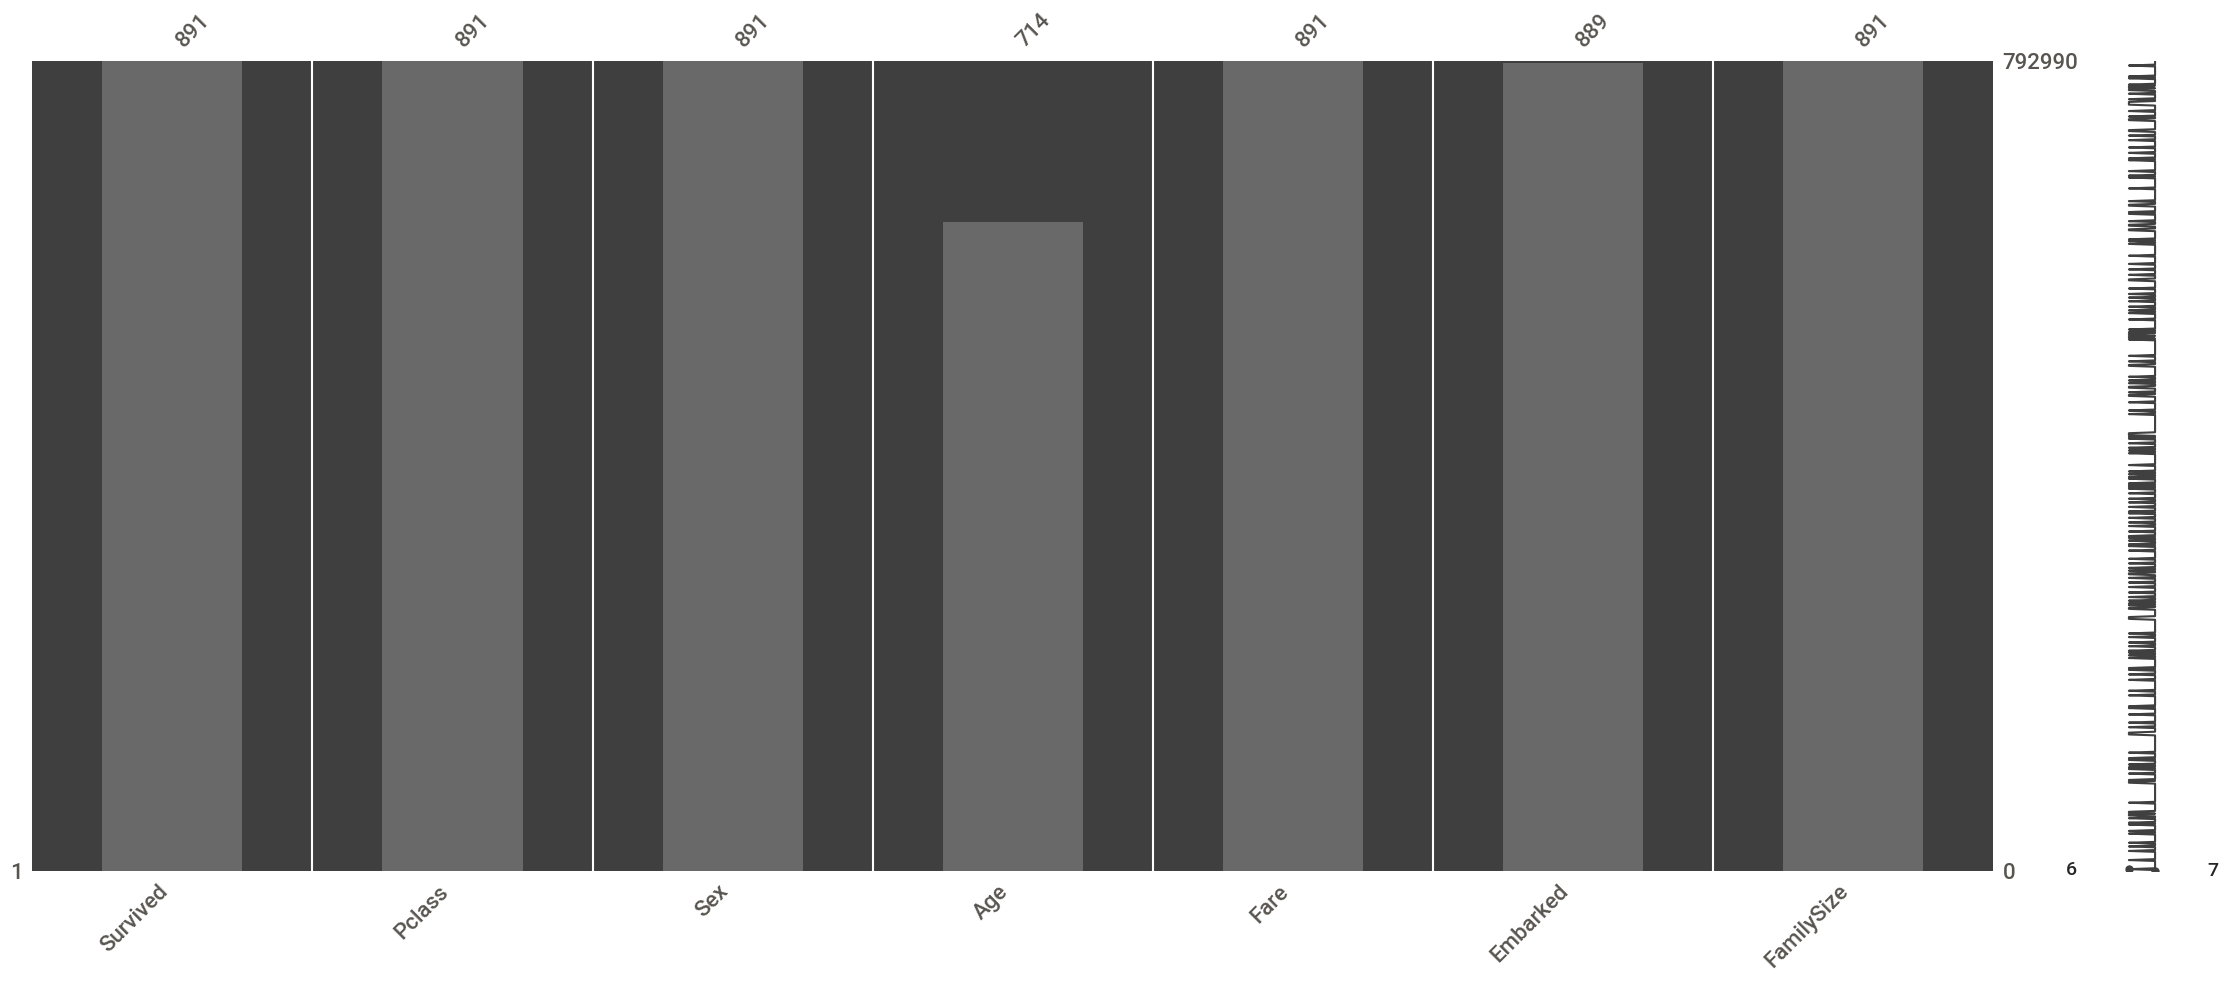

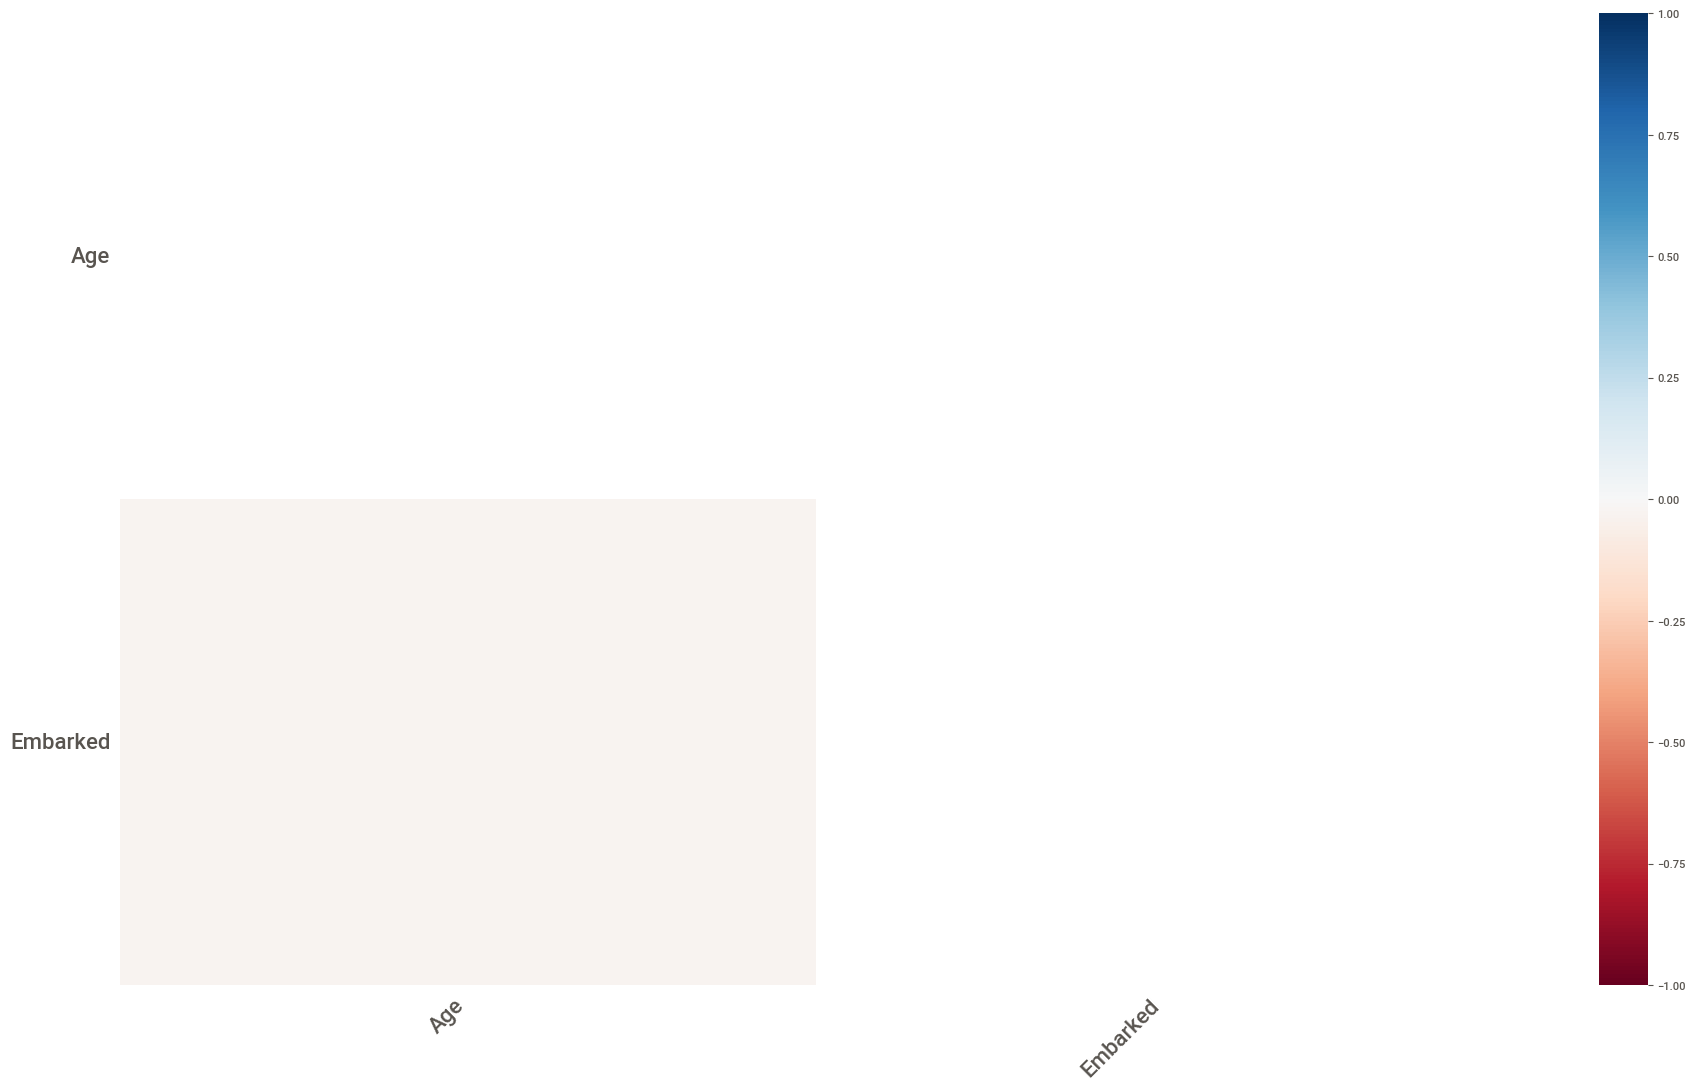

In [19]:
%matplotlib inline

# Visualize missing data
msno.matrix(titanic_df)
msno.bar(titanic_df)
msno.heatmap(titanic_df)

plt.show()